In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [5]:
%cd /content/drive/MyDrive/Colab Notebooks/CV

/content/drive/MyDrive/Colab Notebooks/CV


In [6]:
x_test.shape

(10000, 32, 32, 3)

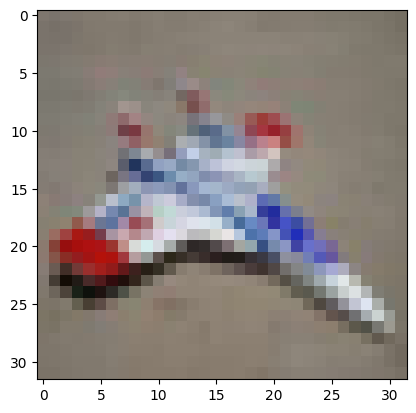

In [7]:
plt.imshow(x_train[30])

In [8]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [25]:
# convert y_train 2d array to 1d array
y_train = y_train.reshape(-1)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [23]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
def plt_sample(x,y, index):
  plt.title(classes[y[index]])
  plt.imshow(x[index])

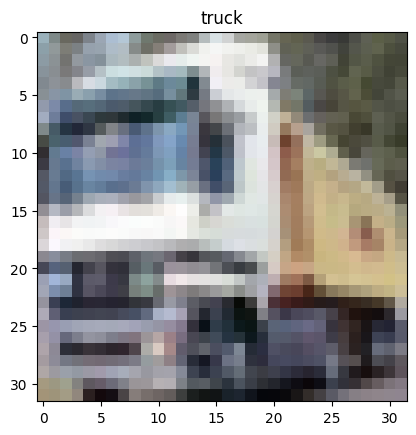

In [24]:
plt_sample(x_train, y_train, 1)

In [28]:
#normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

In [35]:
model = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation='relu', input_shape = x_train[0].shape),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(filters = 64, kernel_size = (3,3), activation='relu', input_shape = x_train[0].shape),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation= 'relu'),
    layers.Dense(32, activation= 'relu'),
    layers.Dense(10, activation= 'softmax')
])

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 20)

Epoch 1/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4997 - accuracy: 0.4586
Epoch 2/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1411 - accuracy: 0.5983
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0084 - accuracy: 0.6460
Epoch 4/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9294 - accuracy: 0.6729
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8654 - accuracy: 0.6973
Epoch 6/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8114 - accuracy: 0.7182
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7587 - accuracy: 0.7361
Epoch 8/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7173 - accuracy: 0.7493
Epoch 9/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6707 - accuracy: 0.7652
Epoch 10/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.637

In [36]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 1.1910 - accuracy: 0.6892


[1.1909810304641724, 0.6891999840736389]

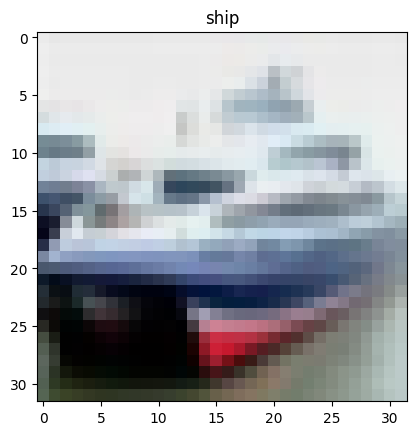

In [47]:
y_test = y_test.reshape(-1)
plt_sample(x_test, y_test, 1)

In [48]:
y_pred = model.predict(x_test[:5])
y_classes = [np.argmax(element) for element in y_pred]
print(y_classes)

1/1 [==============================] - 0s 19ms/step
[3, 8, 8, 8, 4]


In [49]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test[:5], y_classes))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         1
           4       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1
           8       0.67      1.00      0.80         2

    accuracy                           0.60         5
   macro avg       0.33      0.40      0.36         5
weighted avg       0.47      0.60      0.52         5



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [60]:
prediction = model.predict(x_test)


313/313 [==============================] - 3s 8ms/step


tf.Tensor([1.1751200e-12 7.9940357e-13 1.9682862e-08 2.8162731e-07], shape=(4,), dtype=float32)
tf.Tensor([7.5319065e-12 1.0790203e-13 2.8934883e-07 1.2594268e-07], shape=(4,), dtype=float32)
tf.Tensor([1.07153537e-13 7.58439061e-15 1.06343315e-07 3.09238044e-06], shape=(4,), dtype=float32)
tf.Tensor([4.0654185e-13 1.3314220e-15 6.0769589e-06 1.9103737e-08], shape=(4,), dtype=float32)
tf.Tensor([4.5532333e-13 9.5209498e-14 2.8677493e-06 4.5988404e-08], shape=(4,), dtype=float32)
tf.Tensor([3.5962747e-11 3.4313143e-11 2.8614843e-06 8.8309753e-07], shape=(4,), dtype=float32)
tf.Tensor([6.5403100e-12 2.6806781e-09 7.3486390e-06 3.4978759e-06], shape=(4,), dtype=float32)
tf.Tensor([8.9038056e-12 1.2113677e-13 4.0590808e-06 5.5422851e-07], shape=(4,), dtype=float32)
tf.Tensor([3.3285002e-07 5.9954233e-12 9.2041910e-06 9.2230121e-06], shape=(4,), dtype=float32)
tf.Tensor([1.1002990e-09 1.5843686e-11 6.4938297e-07 3.9402170e-07], shape=(4,), dtype=float32)
tf.Tensor([8.3441495e-13 1.8697684e-

tf.Tensor([8.7222499e-05 1.5957538e-14 1.4740576e-04 1.1518178e-08], shape=(4,), dtype=float32)
tf.Tensor([3.2580583e-12 1.9797502e-11 3.3647270e-04 1.0235096e-04], shape=(4,), dtype=float32)
tf.Tensor([2.6294751e-05 1.5377133e-09 1.6643195e-05 4.3125463e-05], shape=(4,), dtype=float32)
tf.Tensor([8.6404467e-11 4.8863522e-09 1.3085333e-05 2.8698018e-04], shape=(4,), dtype=float32)
tf.Tensor([1.2440815e-06 7.1540988e-11 4.9487781e-04 6.6177140e-06], shape=(4,), dtype=float32)
tf.Tensor([2.90781763e-08 1.22364326e-12 1.01687165e-05 4.28508628e-07], shape=(4,), dtype=float32)
tf.Tensor([1.5896093e-08 3.1146870e-11 5.9657602e-04 1.8954380e-06], shape=(4,), dtype=float32)
tf.Tensor([5.0397273e-13 6.4364754e-09 1.2369506e-05 6.1525276e-04], shape=(4,), dtype=float32)
tf.Tensor([2.6869001e-08 2.4153888e-09 2.7924322e-04 3.4345096e-04], shape=(4,), dtype=float32)
tf.Tensor([4.2667536e-10 9.5985675e-10 1.2653622e-04 5.0151162e-04], shape=(4,), dtype=float32)
tf.Tensor([4.1199901e-06 2.3210009e-

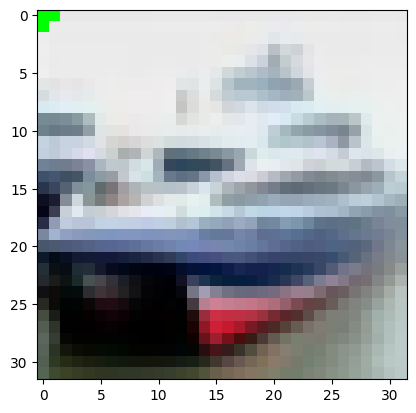

In [86]:
import cv2
image = x_test[1]
boxes = prediction[:, :4]
score = prediction[:, 4]

selected_indices = tf.image.non_max_suppression(boxes, score, max_output_size= 50, iou_threshold = 0.5)
selected_boxes = tf.gather(boxes, selected_indices)

image_with_boxes = image.copy()
for box in selected_boxes:
    print(box)
    cv2.rectangle(image_with_boxes, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), (0, 255, 0), 2)
plt.imshow(image_with_boxes)

TypeError: list indices must be integers or slices, not tuple